## <center>Simple Linear Regression using ANN on Salary Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Salary_dataset.csv')
data.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
data.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [7]:
data.shape

(30, 2)

In [8]:
data.isnull().mean()*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

### Splitting the data into train and test

In [10]:
x = data[['YearsExperience']].values
y = data[['Salary']].values

### Scaling x

In [11]:
sc = StandardScaler()

In [12]:
x = sc.fit_transform(x)

In [13]:
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Setting random seed for reproducibility

In [15]:
tf.random.set_seed(42)

### Define the model architecture

In [16]:
model = Sequential()

### Adding neuron and layers

In [17]:
model.add(Dense(128,activation = 'relu',input_dim = x_train.shape[1] ))
model.add(Dropout(0.2))
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

### Compiling the model

In [18]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

### Define early stopping criteria

In [19]:
early_stopping = EarlyStopping(monitor='val_loss',patience = 50, verbose=1)

### Training the model with early stopping

In [20]:
history = model.fit(x_train,y_train,batch_size=4,callbacks=[early_stopping],epochs=5000,validation_data=(x_test,y_test))

Epoch 1/5000
6/6 [==============================] - 1s 36ms/step - loss: 6271211520.0000 - val_loss: 7430586880.0000
Epoch 2/5000
6/6 [==============================] - 0s 7ms/step - loss: 6271174656.0000 - val_loss: 7430545920.0000
Epoch 3/5000
6/6 [==============================] - 0s 7ms/step - loss: 6271127040.0000 - val_loss: 7430501888.0000
Epoch 4/5000
6/6 [==============================] - 0s 7ms/step - loss: 6271078400.0000 - val_loss: 7430445568.0000
Epoch 5/5000
6/6 [==============================] - 0s 8ms/step - loss: 6271014400.0000 - val_loss: 7430370816.0000
Epoch 6/5000
6/6 [==============================] - 0s 7ms/step - loss: 6270924288.0000 - val_loss: 7430275072.0000
Epoch 7/5000
6/6 [==============================] - 0s 8ms/step - loss: 6270818816.0000 - val_loss: 7430143488.0000
Epoch 8/5000
6/6 [==============================] - 0s 8ms/step - loss: 6270667264.0000 - val_loss: 7429974528.0000
Epoch 9/5000
6/6 [==============================] - 0s 7ms/step - loss:

6/6 [==============================] - 0s 7ms/step - loss: 5719311872.0000 - val_loss: 6823424000.0000
Epoch 72/5000
6/6 [==============================] - 0s 7ms/step - loss: 5713887744.0000 - val_loss: 6795434496.0000
Epoch 73/5000
6/6 [==============================] - 0s 7ms/step - loss: 5677552128.0000 - val_loss: 6767014400.0000
Epoch 74/5000
6/6 [==============================] - 0s 7ms/step - loss: 5648035328.0000 - val_loss: 6738024960.0000
Epoch 75/5000
6/6 [==============================] - 0s 6ms/step - loss: 5618349056.0000 - val_loss: 6708181504.0000
Epoch 76/5000
6/6 [==============================] - 0s 7ms/step - loss: 5581869568.0000 - val_loss: 6676520448.0000
Epoch 77/5000
6/6 [==============================] - 0s 7ms/step - loss: 5583022080.0000 - val_loss: 6645512704.0000
Epoch 78/5000
6/6 [==============================] - 0s 7ms/step - loss: 5525158400.0000 - val_loss: 6613356544.0000
Epoch 79/5000
6/6 [==============================] - 0s 7ms/step - loss: 55367

Epoch 141/5000
6/6 [==============================] - 0s 7ms/step - loss: 2598535168.0000 - val_loss: 3293474048.0000
Epoch 142/5000
6/6 [==============================] - 0s 7ms/step - loss: 2632891648.0000 - val_loss: 3230330624.0000
Epoch 143/5000
6/6 [==============================] - 0s 7ms/step - loss: 2602392576.0000 - val_loss: 3168596224.0000
Epoch 144/5000
6/6 [==============================] - 0s 7ms/step - loss: 2625912576.0000 - val_loss: 3106071296.0000
Epoch 145/5000
6/6 [==============================] - 0s 7ms/step - loss: 2444175360.0000 - val_loss: 3043768064.0000
Epoch 146/5000
6/6 [==============================] - 0s 7ms/step - loss: 2403919616.0000 - val_loss: 2980990976.0000
Epoch 147/5000
6/6 [==============================] - 0s 7ms/step - loss: 2304800000.0000 - val_loss: 2917340160.0000
Epoch 148/5000
6/6 [==============================] - 0s 7ms/step - loss: 2330880768.0000 - val_loss: 2855935744.0000
Epoch 149/5000
6/6 [==============================] - 0s

Epoch 211/5000
6/6 [==============================] - 0s 8ms/step - loss: 229547984.0000 - val_loss: 357663328.0000
Epoch 212/5000
6/6 [==============================] - 0s 7ms/step - loss: 218305744.0000 - val_loss: 343922400.0000
Epoch 213/5000
6/6 [==============================] - 0s 7ms/step - loss: 285983360.0000 - val_loss: 329846176.0000
Epoch 214/5000
6/6 [==============================] - 0s 8ms/step - loss: 236867776.0000 - val_loss: 316338848.0000
Epoch 215/5000
6/6 [==============================] - 0s 7ms/step - loss: 239820048.0000 - val_loss: 304422464.0000
Epoch 216/5000
6/6 [==============================] - 0s 7ms/step - loss: 197114512.0000 - val_loss: 292059680.0000
Epoch 217/5000
6/6 [==============================] - 0s 7ms/step - loss: 222427008.0000 - val_loss: 280372064.0000
Epoch 218/5000
6/6 [==============================] - 0s 7ms/step - loss: 180788864.0000 - val_loss: 269321696.0000
Epoch 219/5000
6/6 [==============================] - 0s 8ms/step - loss

Epoch 354/5000
6/6 [==============================] - 0s 7ms/step - loss: 46549776.0000 - val_loss: 55358912.0000
Epoch 355/5000
6/6 [==============================] - 0s 8ms/step - loss: 48024404.0000 - val_loss: 55736560.0000
Epoch 356/5000
6/6 [==============================] - 0s 8ms/step - loss: 61305068.0000 - val_loss: 56215712.0000
Epoch 357/5000
6/6 [==============================] - 0s 7ms/step - loss: 68787912.0000 - val_loss: 56318144.0000
Epoch 358/5000
6/6 [==============================] - 0s 7ms/step - loss: 44707012.0000 - val_loss: 56210292.0000
Epoch 359/5000
6/6 [==============================] - 0s 7ms/step - loss: 36943436.0000 - val_loss: 55922720.0000
Epoch 360/5000
6/6 [==============================] - 0s 7ms/step - loss: 56993524.0000 - val_loss: 55910976.0000
Epoch 361/5000
6/6 [==============================] - 0s 7ms/step - loss: 46595108.0000 - val_loss: 56017940.0000
Epoch 362/5000
6/6 [==============================] - 0s 7ms/step - loss: 64556096.0000 

Epoch 426/5000
6/6 [==============================] - 0s 7ms/step - loss: 73305312.0000 - val_loss: 55537524.0000
Epoch 427/5000
6/6 [==============================] - 0s 7ms/step - loss: 73510600.0000 - val_loss: 55675572.0000
Epoch 428/5000
6/6 [==============================] - 0s 7ms/step - loss: 76776712.0000 - val_loss: 55745216.0000
Epoch 429/5000
6/6 [==============================] - 0s 8ms/step - loss: 51382124.0000 - val_loss: 55269868.0000
Epoch 429: early stopping


### Evaluating the model

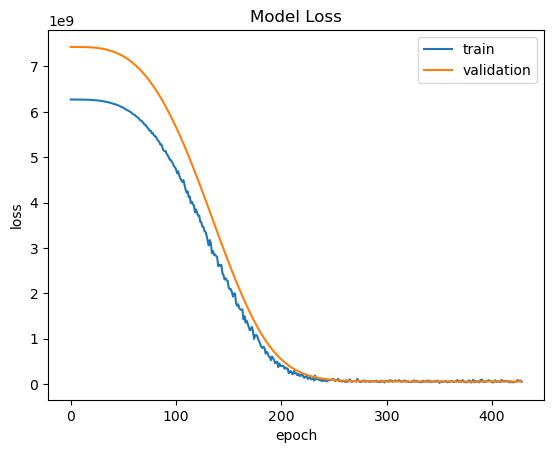

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper right')
plt.show()

Note: We need to give scaled values input to the model to perform prediction

In [22]:
PREDICTION = model.predict([x])

1/1 [==============================] - 0s 85ms/step


In [23]:
OUTPUT = pd.DataFrame(zip(y,PREDICTION), columns= ['ACTUAL','PREDICTION'],dtype=float)
OUTPUT.PREDICTION = OUTPUT.PREDICTION.astype(float)
OUTPUT

,ACTUAL,PREDICTION
0,39344.0,39283.683594
1,46206.0,39714.542969
2,37732.0,40168.976562
3,43526.0,42423.617188
4,39892.0,44235.121094
5,56643.0,51053.335938
6,60151.0,52027.367188
7,54446.0,53975.433594
8,64446.0,53975.433594
9,57190.0,58845.578125


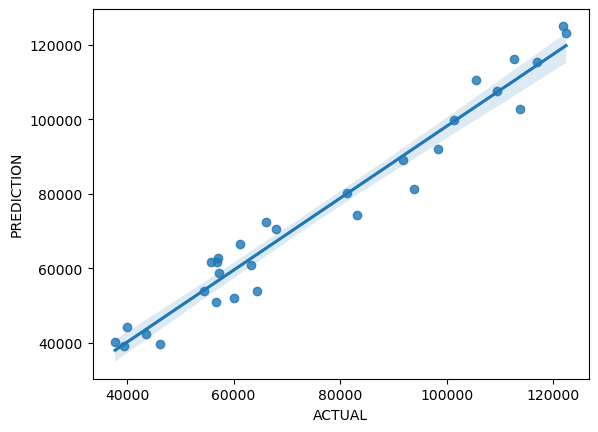

In [25]:
sns.regplot(data = OUTPUT, x = 'ACTUAL',y = 'PREDICTION')
plt.show()